In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_vectorized.csv")

In [3]:
data["genres"] = data["genres"].apply(eval)
lengths = data["genres"].apply(len)

(array([1.5227e+04, 1.4243e+04, 8.8910e+03, 0.0000e+00, 2.8310e+03,
        6.2000e+02, 0.0000e+00, 1.1200e+02, 1.1000e+01, 1.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

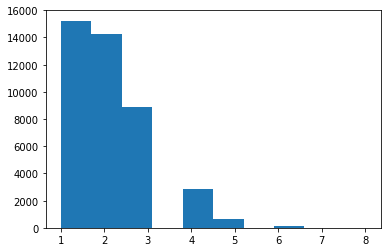

In [8]:
plt.hist(lengths)

In [4]:
genres = {}
n = 0
for i in data['genres']:
    for item in i:
        if item not in genres:
            genres[item] = 1
        else:
            genres[item] += 1

In [5]:
sorted_genres = [i[0] for i in sorted(genres.items(), key=lambda x: x[1])]

In [6]:
data['one_genres'] = [0] * len(data)
data.iloc[2]['one_genres']

0

In [7]:
data['one_genres'] = [0] * len(data)
for e, i in enumerate(data['genres']):
    flag = True
    for genre in sorted_genres:
        if flag:
            if genre in i:
                data.loc[e,['one_genres']] = genre
                flag = False
    if e % 1000 == 0:
        print(data.iloc[e]['one_genres'])

Family
Comedy
Mystery
Drama
Music
Drama
Horror
Romance
Family
Comedy
Science Fiction
Action
Drama
Comedy
Fantasy
Adventure
Mystery
Horror
Drama
Documentary
Comedy
Thriller
Crime
Mystery
Comedy
Horror
Western
Thriller
Horror
Thriller
Thriller
Comedy
Romance
Science Fiction
Adventure
Crime
Mystery
Documentary
Music
Music
Drama
Science Fiction


In [67]:
data['one_genres']

0                 Family
1                Fantasy
2                Romance
3                Romance
4                 Comedy
              ...       
41931    Science Fiction
41932             Action
41933             Family
41934              Drama
41935             Action
Name: one_genres, Length: 41936, dtype: object

In [12]:
from collections import Counter
counts = Counter(data['one_genres'])
print(counts)

Counter({'Drama': 5333, 'Comedy': 5257, 'Romance': 4389, 'Documentary': 3210, 'Crime': 3098, 'Horror': 2617, 'Mystery': 2258, 'Fantasy': 2177, 'Science Fiction': 2164, 'Family': 1935, 'Action': 1927, 'Music': 1526, 'Adventure': 1439, 'Thriller': 1292, 'War': 1277, 'Western': 1034, 'History': 1003})


In [16]:
data.head()

,original_title,overview,genres,tokens,Comedy,Family,Adventure,Fantasy,Romance,Drama,...,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,vec,one_genres
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","['led', 'woodi', 'andi', 'toy', 'live', 'happi...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Family
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","['sibl', 'judi', 'discov', 'enchant', 'board',...",0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Fantasy
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","['famili', 'wed', 'reignit', 'ancient', 'feud'...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Romance
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","['cheat', 'mistreat', 'step', 'women', 'hold',...",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Romance
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"['georg', 'bank', 'recov', 'daughter', 'wed', ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Comedy


data_one = data['original_title']

In [28]:
data_one = data[['original_title','tokens','one_genres']]
#genres = genres.keys()
genres = list(genres)

In [29]:
for gen in genres:
    data_one[gen] = [0] * len(data_one)

C:\Users\Jooeun Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
n = 0
for gen in genres:
    for i in data_one['one_genres']:
        if gen in i:
            data_one.loc[n,[gen]] = 1
        n += 1
    print(n == len(data_one))
    n = 0

C:\Users\Jooeun Kim\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [36]:
vectors = []
n = 0
for i in range(len(data_one)):
    vectors.append(list(data_one.iloc[n][3:-1]))
    n += 1
data_one['vec'] = vectors

C:\Users\Jooeun Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
data_one

,original_title,tokens,one_genres,Comedy,Family,Adventure,Fantasy,Romance,Drama,Crime,...,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,vec
0,Toy Story,"['led', 'woodi', 'andi', 'toy', 'live', 'happi...",Family,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Jumanji,"['sibl', 'judi', 'discov', 'enchant', 'board',...",Fantasy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Grumpier Old Men,"['famili', 'wed', 'reignit', 'ancient', 'feud'...",Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Waiting to Exhale,"['cheat', 'mistreat', 'step', 'women', 'hold',...",Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Father of the Bride Part II,"['georg', 'bank', 'recov', 'daughter', 'wed', ...",Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41931,Caged Heat 3000,"['year', 'ad', 'world', 'danger', 'women', 'ba...",Science Fiction,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
41932,Robin Hood,"['yet', 'anoth', 'version', 'classic', 'epic',...",Action,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
41933,رگ خواب,"['rise', 'fall', 'man', 'woman']",Family,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
41934,Siglo ng Pagluluwal,"['artist', 'struggl', 'finish', 'work', 'story...",Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
len(data_one['vec'][1])

17

In [40]:
data = data_one[['original_title', 'tokens', 'one_genres','vec']]

In [44]:
data_one.to_csv('data_one_genre.csv', index=False)